# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [5]:
#!pip install jupyterquiz
#run this if this is not installed

DEPRECATION: Loading egg at c:\users\mucahit\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [6]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [7]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [9]:
#start with importing all we need
import numpy as np
import matplotlib.pyplot as plt
#so on

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by $$v = \sqrt{\frac{2GM}{R}}$$
</details>

In [11]:
def escape_velocity(M, R):
    G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
    return np.sqrt(2 * G * M / R)

# Calculate for Earth
mass_earth = 5.972e24  # kg
radius_earth = 6371e3  # m
v_earth = escape_velocity(mass_earth, radius_earth)
print(f"Escape velocity for Earth: {v_earth:.2f} m/s")


Escape velocity for Earth: 11185.98 m/s


In [13]:
def rms_velocity(T, M):
    k = 1.380649e-23  # Boltzmann constant (m^2 kg s^-2 K^-1)
    return np.sqrt(3 * k * T / M)

# Calculate for O2 molecule
temperature_earth = 288  # K (average surface temperature of Earth)
mass_O2 = 2 * 16 * 1.660539e-27  # kg (mass of O2 molecule)
v_rms_O2 = rms_velocity(temperature_earth, mass_O2)
print(f"RMS velocity of O2 molecule: {v_rms_O2:.2f} m/s")
print(f"Can O2 molecule escape Earth? {'Yes' if v_rms_O2 > v_earth else 'No'}")

RMS velocity of O2 molecule: 473.80 m/s
Can O2 molecule escape Earth? No


In [14]:
display_quiz(git_path+"question1.json")#These are for interactive questions

<IPython.core.display.Javascript object>

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [15]:
def orbital_period(a, M1, M2):
    G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
    return 2 * np.pi * np.sqrt(a**3 / (G * (M1 + M2)))

# Calculate for two stars
semi_major_axis = 1.496e11  # m (e.g., 1 AU)
mass_star1 = 1.989e30  # kg (mass of the Sun)
mass_star2 = 1.989e30  # kg (mass of the other star)
period = orbital_period(semi_major_axis, mass_star1, mass_star2)
print(f"Orbital period: {period:.2e} s")

Orbital period: 2.23e+07 s


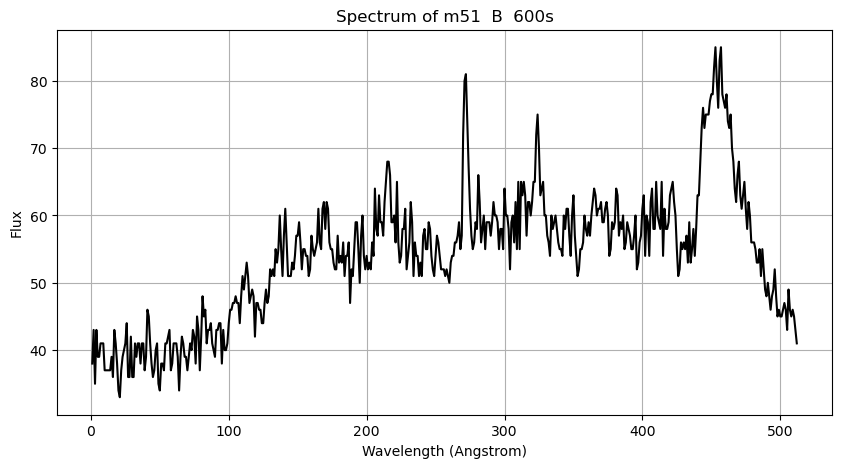

In [17]:
from astropy.io import fits
from astropy.wcs import WCS

# Open the FITS file
fits_file = 'example_data.fits'  # name of the FITS file
hdul = fits.open(fits_file)
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

# Get the spectrum data
flux = data[0]  # y-axis data
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]  # x-axis data (wavelength)

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.plot(wv_am, flux, color='black')
plt.title(f'Spectrum of {obj_name}')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.grid()
plt.show()

In [18]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

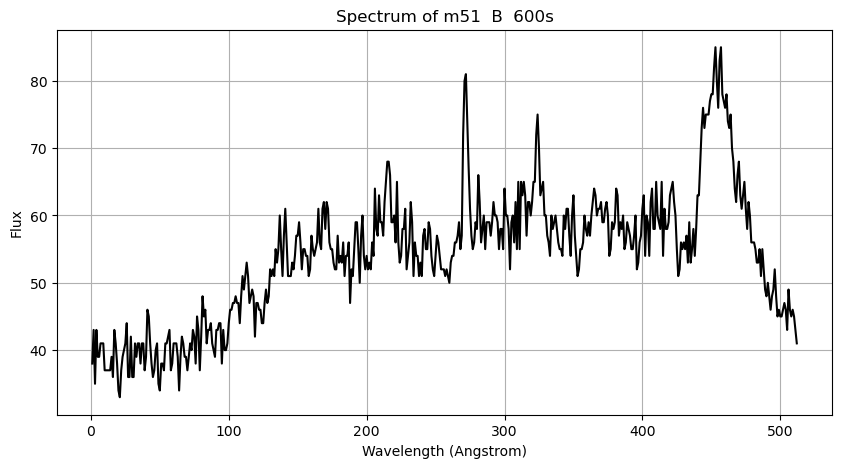

In [20]:
from astropy.io import fits
from astropy.wcs import WCS

# Open the FITS file
fits_file = 'example_data.fits'  # name of the FITS file
hdul = fits.open(fits_file)
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

# Get the spectrum data
flux = data[0]  # y-axis data
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]  # x-axis data (wavelength)

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.plot(wv_am, flux, color='black')
plt.title(f'Spectrum of {obj_name}')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.grid()
plt.show()

In [12]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

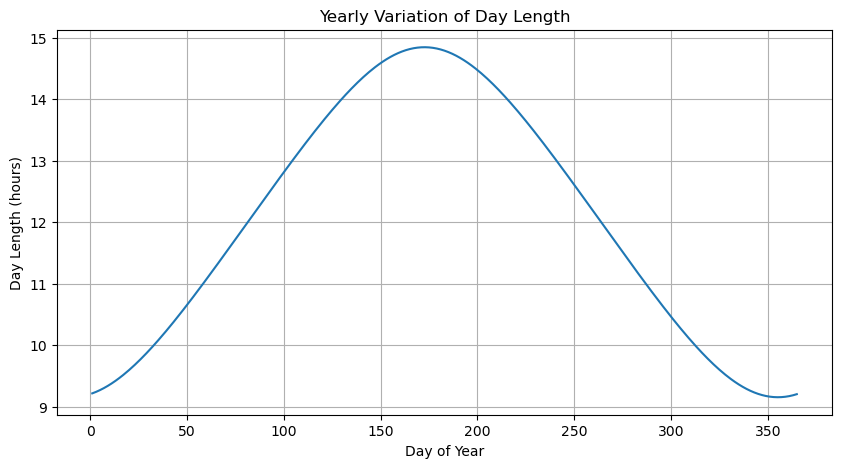

In [21]:
# Day length calculation
def day_length(latitude, day_of_year):
    epsilon = 23.44  # Axial tilt (degrees)
    delta = -np.arcsin(np.sin(np.radians(epsilon)) * np.cos(np.radians(360/365.24 * (day_of_year + 10))))
    return 24 * (1 - np.arccos(np.tan(np.radians(latitude)) * np.tan(delta)) / np.pi)

latitude = 40.0  # Latitude (e.g., 40 degrees)
days = np.arange(1, 366)
lengths = day_length(latitude, days)

# Plot the variation
plt.figure(figsize=(10, 5))
plt.plot(days, lengths)
plt.title('Yearly Variation of Day Length')
plt.xlabel('Day of Year')
plt.ylabel('Day Length (hours)')
plt.grid()
plt.show()

In [14]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

In [22]:
import astropy.units as u
from astropy.time import Time

def sidereal_to_solar(sidereal_days):
    sidereal_day_length = 23.9344696 * u.hour  # length of a sidereal day in hours
    solar_day_length = 24 * u.hour  # length of a solar day in hours
    conversion_factor = solar_day_length / sidereal_day_length
    return sidereal_days * conversion_factor

# Example usage:
sidereal_days = 1
solar_days = sidereal_to_solar(sidereal_days)
print(f"{sidereal_days} sidereal day(s) is equivalent to {solar_days:.2f}")

1 sidereal day(s) is equivalent to 1.00


## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

In [23]:
def light_travel_time(distance, speed_of_light=299792.458):  # km/s
    time = distance / speed_of_light
    return time

# Example usage:
distance = 149597870.7  # distance from Earth to Sun in km (1 AU)
time = light_travel_time(distance)
print(f"Light travel time from Earth to Sun: {time:.2f} seconds")


Light travel time from Earth to Sun: 499.00 seconds


In [17]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [24]:
def planck_law(wavelength, temperature):
    # Planck's Law
    numerator = 2 * h * c**2 / wavelength**5
    denominator = np.exp((h * c) / (wavelength * k * temperature)) - 1
    return numerator / denominator

# Example usage:
wavelength = 500e-9  # 500 nm in meters
temperature = 5800  # temperature in Kelvin (e.g., surface of the Sun)
intensity = planck_law(wavelength, temperature)
print(f"Intensity of blackbody radiation at {wavelength*1e9:.0f} nm and {temperature} K: {intensity:.2e} W/m^2")

Intensity of blackbody radiation at 500 nm and 5800 K: 2.69e+13 W/m^2


In [19]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

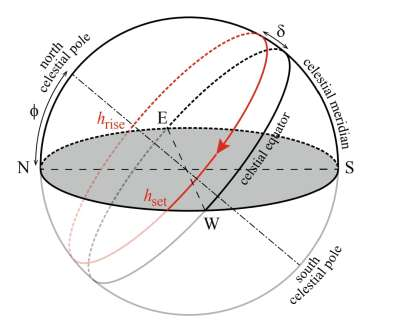

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [20]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Mercury')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (3.40722956, 15.74992254)>
15d44m59.72113805s
22d29m28.3s


In [21]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.687832250213155
T =  12.89408859510434 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

TypeError: only dimensionless scalar quantities can be converted to Python scalars

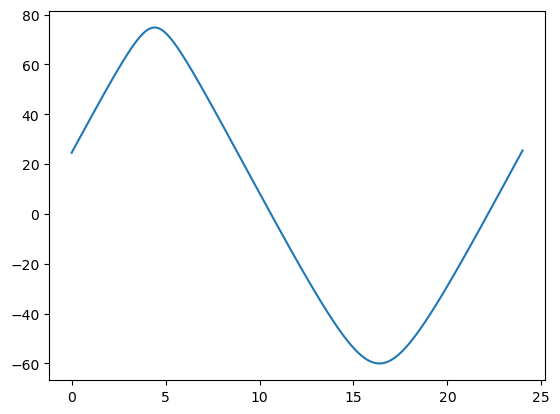

In [31]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

def star_visibility(star_name, location, date):
    # Define the observation time and location
    time = Time(date)
    delta_time = np.linspace(0, 24, 1000) * u.hour
    times = time + delta_time
    frame = AltAz(obstime=times, location=location)
    
    # Get the star's position
    if star_name.lower() == 'betelgeuse':
        star = SkyCoord('05h55m10.3053s +07d24m25.426s', frame='icrs')
    else:
        raise ValueError("Unknown star")
    
    star_altaz = star.transform_to(frame)
    
    # Calculate the time above the horizon
    above_horizon = star_altaz.alt > 0
    visible_hours = np.sum(above_horizon) * (delta_time[1] - delta_time[0]).to(u.hour)
    
    # Plotting the altitude of the star over the day
    plt.plot(delta_time, star_altaz.alt, label=star_name)
    plt.fill_between(delta_time, 0, 90, where=above_horizon, color='green', alpha=0.3)
    plt.axhline(0, color='black', lw=1)
    plt.xlabel('Time (hours)')
    plt.ylabel('Altitude (degrees)')
    plt.legend()
    plt.title(f'Visibility of {star_name} on {date}')
    plt.grid()
    plt.show()
    
    return visible_hours

# Example usage:
location = EarthLocation(lat=22.57*u.deg, lon=88.37*u.deg, height=9*u.m)  # Jadavpur, Kolkata, India
date = '2024-07-16'
star_name = 'betelgeuse'
visible_hours = star_visibility(star_name, location, date)
print(f"Betelgeuse is visible for {visible_hours:.2f} hours on {date} in Jadavpur, Kolkata, India.")

In [32]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

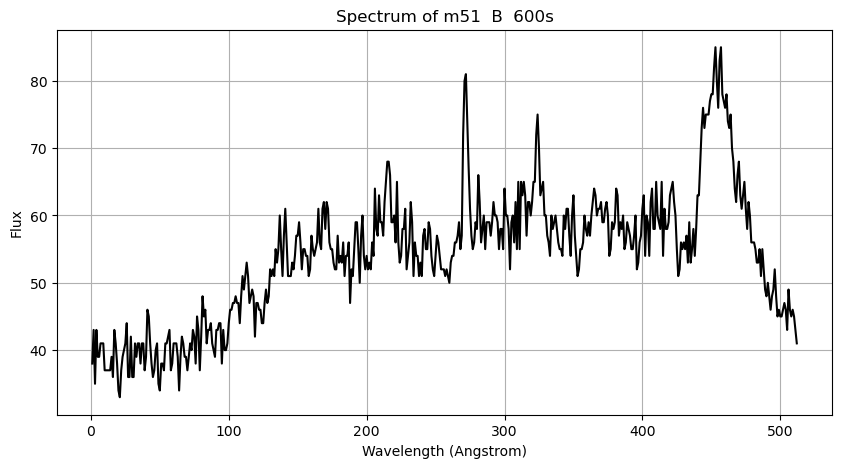

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Open the FITS file
fits_file = 'example_data.fits'  # name of the FITS file
hdul = fits.open(fits_file)
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]  # y-axis data
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]  # x-axis data (wavelength)

# Plot the spectrum
plt.figure(figsize=(10, 5))
plt.plot(wv_am, flux, color='black')
plt.title(f'Spectrum of {obj_name}')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.grid()
plt.show()

https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [25]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.